<a href="https://colab.research.google.com/github/2403a52030-sketch/NLP-LAB/blob/main/ML_LAB_10_2030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#  Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
# Read 'Data Description.csv'
data_description_df = pd.read_csv('/content/Data Description.csv')
data_description_df.head()

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase


In [8]:
# Read 'CO2 Emissions_Canada.csv'
co2_emissions_df = pd.read_csv('/content/CO2 Emissions_Canada.csv')
co2_emissions_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
# Select feature (Engine Size) and target (CO2 Emissions)

X = co2_emissions_df[['Engine Size(L)']]   # Feature
y = co2_emissions_df['CO2 Emissions(g/km)']   # Target

In [11]:
# Fit Linear Regression and extract coefficient β1

model = LinearRegression()
model.fit(X, y)

beta_1 = model.coef_[0]   # Slope coefficient

print("Estimated β₁ (Engine Size coefficient):", beta_1)

Estimated β₁ (Engine Size coefficient): 36.77731518641943


In [13]:
#  Bootstrap to estimate confidence intervals for β1

B = 2000
bootstrap_betas = []

n = len(X)

for i in range(B):
    # Sample with replacement
    sample_indices = np.random.choice(n, n, replace=True)
    sample_X = X.iloc[sample_indices]
    sample_y = y.iloc[sample_indices]

    # Fit model on bootstrap sample
    model_bs = LinearRegression()
    model_bs.fit(sample_X, sample_y)

    # Store β1
    bootstrap_betas.append(model_bs.coef_[0])

bootstrap_betas = np.array(bootstrap_betas)

In [14]:
# Calculate confidence intervals

# 90% Confidence Interval
ci_90 = np.percentile(bootstrap_betas, [5, 95])

# 95% Confidence Interval
ci_95 = np.percentile(bootstrap_betas, [2.5, 97.5])

print("90% Confidence Interval for β₁:", ci_90)
print("95% Confidence Interval for β₁:", ci_95)

90% Confidence Interval for β₁: [36.260572   37.28172174]
95% Confidence Interval for β₁: [36.16622623 37.38532065]


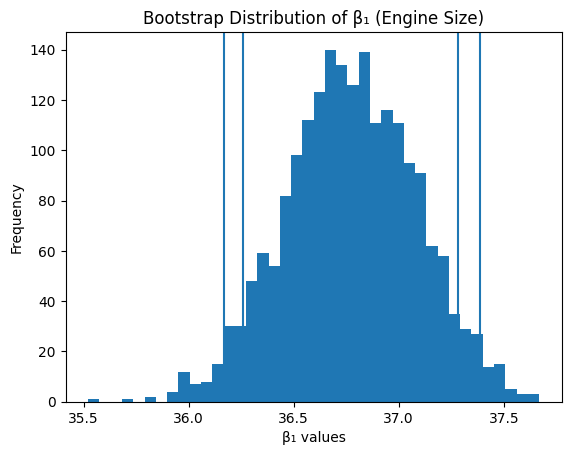

In [15]:
# Plot bootstrap distribution

plt.hist(bootstrap_betas, bins=40)
plt.axvline(ci_90[0])
plt.axvline(ci_90[1])
plt.axvline(ci_95[0])
plt.axvline(ci_95[1])
plt.title("Bootstrap Distribution of β₁ (Engine Size)")
plt.xlabel("β₁ values")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Comparison of confidence intervals

print("β₁ from original model:", beta_1)
print("90% CI width:", ci_90[1] - ci_90[0])
print("95% CI width:", ci_95[1] - ci_95[0])

β₁ from original model: 36.77731518641943
90% CI width: 1.0211497374564402
95% CI width: 1.2190944252083469


In [17]:
# Statistical conclusion

if ci_95[0] > 0 or ci_95[1] < 0:
    print("Conclusion:")
    print("Engine size has a statistically significant effect on CO₂ emissions.")
else:
    print("Conclusion:")
    print("Engine size does NOT have a statistically significant effect on CO₂ emissions.")

Conclusion:
Engine size has a statistically significant effect on CO₂ emissions.
